In [1]:
using QuantumOptics
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Visual.jl")

char_func (generic function with 4 methods)

### Defining basis and operators

In [2]:
const N = 15 # Cavity Dimension

# Cavity Operators
fb = FockBasis(N-1)

a = destroy(fb)
at = create(fb)
Ic = identityoperator(fb)

# qutrit operators
qb = FockBasis(3-1)

Iq = identityoperator(qb)
q = destroy(qb)
qt = create(qb)
sz_ge = Operator(qb,qb, [-1 0 0; 0 1 0; 0 0 1])
sz_gf = Operator(qb,qb, [-1 0 0; 0 0 0; 0 0 1])
sy_ge = Operator(qb,qb, [0 -1im 0; 1im 0 0; 0 0 1])
sy_ef = Operator(qb,qb, [1 0 0; 0 0 -1im; 0 1im 0])
sx_ge = Operator(qb,qb, [0 1 0; 1 0 0; 0 0 1])
sx_ef = Operator(qb,qb, [1 0 0; 0 0 1; 0 1 0])



g = fockstate(qb,0)
e = fockstate(qb,1)
f = fockstate(qb,2)
ge = 1/√2*(g+e)
vac = fockstate(fb,0) 
proj_g = projector(g) ⊗ Ic ⊗ Ic ⊗ Ic
proj_e = projector(e) ⊗ Ic ⊗ Ic ⊗ Ic
proj_f = projector(f) ⊗ Ic ⊗ Ic ⊗ Ic

gvvv = g ⊗ vac ⊗ vac ⊗ vac
evvv = e ⊗ vac ⊗ vac ⊗ vac
gevvv = ((g+e)/√2) ⊗ vac ⊗ vac ⊗ vac
gfvvv = ((g+f)/√2) ⊗ vac ⊗ vac ⊗ vac

Ket(dim=10125)
  basis: [Fock(cutoff=2) ⊗ Fock(cutoff=14) ⊗ Fock(cutoff=14) ⊗ Fock(cutoff=14)]
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                    ⋮
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im

## Notes
- currently dispersive ham not corr3ect
- qubit dephasing operator not correct

### Hamiltonian Terms and Time evolution

In [3]:
######## Hamiltonians ########

const χ = 2π*0.0


H_dispersive_ge = -χ/2 * projector(g) ⊗ ((at*a) ⊗ Ic ⊗ Ic + Ic ⊗ (at*a) ⊗ Ic + Ic ⊗ Ic ⊗ (at*a)) + 
χ/2 * projector(e) ⊗ ((at*a) ⊗ Ic ⊗ Ic + Ic ⊗ (at*a) ⊗ Ic + Ic ⊗ Ic ⊗ (at*a)) +
3*χ/2 * projector(f) ⊗ ((at*a) ⊗ Ic ⊗ Ic + Ic ⊗ (at*a) ⊗ Ic + Ic ⊗ Ic ⊗ (at*a)) # Hamiltonian assuming the drive is omega_c-chi/2

H_dispersive_gf = -χ * projector(g) ⊗ ((at*a) ⊗ Ic ⊗ Ic + Ic ⊗ (at*a) ⊗ Ic + Ic ⊗ Ic ⊗ (at*a)) + 
χ* projector(f) ⊗ ((at*a) ⊗ Ic ⊗ Ic + Ic ⊗ (at*a) ⊗ Ic + Ic ⊗ Ic ⊗ (at*a)) 


# H_dispersive_ef = -χ/2 * sz_gf ⊗ (at*a) ⊗ (at*a) ⊗ (at*a) # dispersive hamiltonian when resonant with the e state. Assuming χ_ge = χ_ef


# Qubit Hamiltonians
function H_qubit_drive_ge(δ, θ = 0)
    # θ = 0 -> rotate around x axis
    # θ = pi/2 -> rotate around y axis 
    # pi flip if ϵ*T_max = pi
    δ/2*(cos(θ)*sx_ge + sin(θ)*sy_ge)
end

function H_qubit_drive_ef(δ, θ = 0)
    # θ = 0 -> rotate around x axis
    # θ = pi/2 -> rotate around y axis 
    # pi flip if ϵ*T_max = pi
    δ/2*(cos(θ)*sx_ef + sin(θ)*sy_ef)
end

function H_cav_drive(ϵ)
    # sign is chosen to match displace 
    # α = ϵ*T_max
    (conj(ϵ * 1im)a + ϵ * 1im*dagger(a)) 
end

function H_CD_ge(β)
    sz_ge⊗(conj(β)*a+β*at) 
end

function H_CD_gf(β)
    sz_gf⊗(conj(β)*a+β*at) 
end


function H_triple_CD_ge(α,β,γ)
    sz_ge⊗(a⊗Ic⊗Ic*conj(α)+at⊗Ic⊗Ic*α + Ic⊗a⊗Ic*conj(β)+Ic⊗at⊗Ic*β + Ic⊗Ic⊗a*conj(γ)+Ic⊗Ic⊗at*γ)
end

function H_triple_CD_gf(α,β,γ)
    sz_gf⊗(a⊗Ic⊗Ic*conj(α)+at⊗Ic⊗Ic*α + Ic⊗a⊗Ic*conj(β)+Ic⊗at⊗Ic*β + Ic⊗Ic⊗a*conj(γ)+Ic⊗Ic⊗at*γ)
end

######### Collapse Operators #########
function photon_loss_cavity_jump_operator(κ = κ_cav,a = a)
    sqrt(κ)*a
end

function photon_loss_qubit_jump_operator(κ = κ_qubit,q = q)
    sqrt(κ)*q
end

# function dephasing_qubit_jump_operator(γ = γ_qubit, a) # need to edit!
#     sqrt(κ)* 0.5*sqrt(γ)*sz
# end

######### Time Evolution #########

### Qubit Rotations
function R_evolution_ge(δ, t,  state, θ = 0)
    H_total = H_qubit_drive_ge(δ, θ) ⊗ Ic ⊗ Ic ⊗ Ic + H_dispersive_ge
    tout, ψt = timeevolution.schroedinger(t, state, H_total);
    last(ψt)
end

function R_evolution_ef(δ, t,  state, θ = 0)
    H_total = H_qubit_drive_ef(δ, θ) ⊗ Ic ⊗ Ic ⊗ Ic + H_dispersive_gf
    tout, ψt = timeevolution.schroedinger(t, state, H_total);
    last(ψt)
end

function R_evolution_ge_loss(δ, t, ρ, J, θ = 0)
    H_total = H_qubit_drive_ge(δ, θ) ⊗ Ic ⊗ Ic ⊗ Ic + H_dispersive_ge
    tout, ρt = timeevolution.master(t, ρ, H_total, J);
    last(ρt)
end

function R_evolution_ef_loss(δ, t, ρ, J, θ = 0)
    H_total = H_qubit_drive_ef(δ, θ) ⊗ Ic ⊗ Ic ⊗ Ic + H_dispersive_gf
    tout, ρt = timeevolution.master(t, ρ, H_total, J);
    last(ρt)
end

### Cavity Displacement
function D_evolution(ϵ ,t , state)
    H_total = Iq ⊗ (H_cav_drive(ϵ[1]) ⊗ Ic ⊗ Ic + Ic ⊗ H_cav_drive(ϵ[2]) ⊗ Ic + 
    Ic ⊗ Ic ⊗ H_cav_drive(ϵ[3])) + H_dispersive_gf
    tout, ψt = timeevolution.schroedinger(t, state, H_total)
    last(ψt)
end

function D_evolution_loss(ϵ ,t , ρ, J)
    H_total = Iq ⊗ (H_cav_drive(ϵ[1]) ⊗ Ic ⊗ Ic + Ic ⊗ H_cav_drive(ϵ[2]) ⊗ Ic + 
    Ic ⊗ Ic ⊗ H_cav_drive(ϵ[3])) + H_dispersive_gf
    tout, ρt = timeevolution.master(t, ρ, H_total, J)
    last(ρt)
end

### Conditinal cavity displacement

function triple_CD_ge_evolution(β ,t , state)
    # final conditinal displacement beta given by β*max(t)
    H_total = H_triple_CD_ge(β[1],β[2],β[3]) 
    tout, ψt = timeevolution.schroedinger(t, state, H_total)
    last(ψt)
end

function triple_CD_gf_evolution(β ,t , state)
    # final conditinal displacement beta given by β*max(t)
    H_total = H_triple_CD_gf(β[1],β[2],β[3])
    tout, ψt = timeevolution.schroedinger(t, state, H_total)
    last(ψt)
end

function triple_CD_ge_evolution_loss(β ,t , ρ, J)
    # final conditinal displacement beta given by β*max(t)
    H_total = H_triple_CD_ge(β[1],β[2],β[3])
    tout, ψt = timeevolution.master(t, ρ, H_total,J)
    last(ψt)
end

function triple_CD_gf_evolution_loss(β ,t , ρ, J)
    # final conditinal displacement beta given by β*max(t)
    H_total = H_triple_CD_gf(β[1],β[2],β[3])
    tout, ψt = timeevolution.master(t, ρ, H_total, J)
    last(ψt)
end


### States

triple_CD_gf_evolution_loss (generic function with 1 method)

### Testing gates to ensure they do the right thing

In [14]:
# Qubit Rotations (works)
t = [0:0.1:1;]

state_pi2_ge = R_evolution_ge(π/2, t, gvvv)
state_pi2_ef = R_evolution_ef(π/2, t, R_evolution_ge(π, t, gvvv))
print(ptrace(state_pi2_ge, [2,3,4]))
print(ptrace(state_pi2_ef, [2,3,4]))

In [ ]:
# MultiMode displacement (works)
ϵ_list = [1,0.5,1.5].*1im
t_list = [0:0.1:1;]

state_evolved = D_evolution(ϵ_list, t_list, gvvv)

fig, axs = subplots(1,3)
quick_plot_wigner(ptrace(state_evolved,[1,3,4]), ax = axs[1])
quick_plot_wigner(ptrace(state_evolved,[1,2,4]), ax = axs[2])
quick_plot_wigner(ptrace(state_evolved,[1,2,3]), ax = axs[3])
gcf()

In [ ]:
# triple conditional displacement ge (works)
ϵ_list = [0.5,-1,2]
t_list = [0:0.1:1;]

state_evolved = triple_CD_ge_evolution(ϵ_list, t_list, evvv)

fig, axs = subplots(1,3)
quick_plot_wigner(ptrace(state_evolved,[1,3,4]), ax = axs[1])
quick_plot_wigner(ptrace(state_evolved,[1,2,4]), ax = axs[2])
quick_plot_wigner(ptrace(state_evolved,[1,2,3]), ax = axs[3])
gcf()



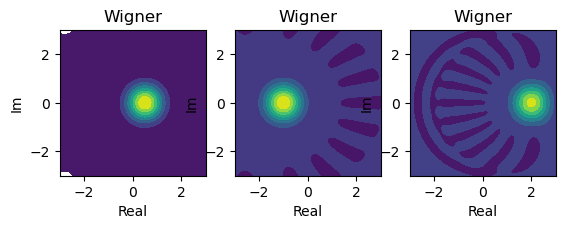

In [121]:
# triple conditional displacement gf (works)
ϵ_list = [0.5,-1,2]
t_list = [0:0.1:1;]

state_evolved = triple_CD_gf_evolution(ϵ_list, t_list, gvvv)

fig, axs = subplots(1,3)
quick_plot_wigner(ptrace(state_evolved,[1,3,4]), ax = axs[1])
quick_plot_wigner(ptrace(state_evolved,[1,2,4]), ax = axs[2])
quick_plot_wigner(ptrace(state_evolved,[1,2,3]), ax = axs[3])
gcf()



### W state creation - without loss

In [4]:
θ = π/2# rotate around y axis
ϕ = 0.95531*2
t_list_rotation = [0:0.01:0.05;]
t_list_displacement = [0:0.01:0.05;]
t_list_conditinal_displacement = [0:0.1:0.6;]

α = 3*1im # relative scaling factor. final state will be α00 + 0α0 +...

β_list_1 = [-2,1,1].*α/2
β_list_2 = [2,0,-2].*α/2
α_list = [0, 0.5,0.5].*α*1im

# 0. Start in gvvv 
ψ0 = gvvv
# 1. rotate ge by pi/2
ψ1 = R_evolution_ge(ϕ*1/(last(t_list_rotation)), t_list_rotation, ψ0, θ) # roation around y
# 2. conditional ge displacement
ψ2 = triple_CD_ge_evolution(β_list_1.*(1/last(t_list_conditinal_displacement)), t_list_conditinal_displacement, ψ1)
# 3. rotate ef by pi/2
ψ3 = R_evolution_ef(π/2*1/(last(t_list_rotation)), t_list_rotation, ψ2, θ)
# 4. conditional gf displacement
ψ4 = triple_CD_gf_evolution(β_list_2.*1/last(t_list_conditinal_displacement), t_list_conditinal_displacement, ψ3)
# 5. Single displacements
ψ5 = D_evolution(α_list*1/(last(t_list_displacement)), t_list_displacement, ψ4)
# 6. rotate ef by pi/2
ψ6 = R_evolution_ef(-π/2*1/(last(t_list_rotation)), t_list_rotation, ψ5, θ)
# 7. rotate ge by pi/2
ψ7 = R_evolution_ge(-ϕ*1/(last(t_list_rotation)), t_list_rotation, ψ6, θ)
# 8. project on g
ψ8 = normalize(proj_g  *ψ7);
ψ8_cav = ptrace(ψ8, [1])

Operator(dim=3375x3375)
  basis: [Fock(cutoff=14) ⊗ Fock(cutoff=14) ⊗ Fock(cutoff=14)]
  0.00118008+0.0im          …   0.0-0.0im   0.0+0.0im   0.0+0.0im
  -0.0011014+1.96356e-11im     -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
  0.00218069-3.88771e-11im      0.0-0.0im   0.0+0.0im   0.0+0.0im
 -0.00352511+6.28454e-11im     -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
  0.00493577-8.79946e-11im      0.0-0.0im   0.0+0.0im   0.0+0.0im
 -0.00617831+1.10146e-10im  …  -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
  0.00706946-1.26034e-10im      0.0-0.0im   0.0+0.0im   0.0+0.0im
  -0.0074618+1.33028e-10im     -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
  0.00743651-1.32577e-10im      0.0-0.0im   0.0+0.0im   0.0+0.0im
 -0.00682799+1.21729e-10im     -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
            ⋮               ⋱                          
         0.0-0.0im              0.0-0.0im   0.0+0.0im   0.0+0.0im
        -0.0-0.0im             -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
        -0.0+0.0im             -0.0+0.0im  -0.0-0.0im  -0.0-0.0im

Ideal Density matrix



3×3 Matrix{Complex}:
 0.326133+0.0im  0.326133+0.0im  0.326133+0.0im
 0.326133+0.0im  0.326133+0.0im  0.326133+0.0im
 0.326133+0.0im  0.326133+0.0im  0.326133+0.0im
Protocol Density matrix



3×3 Matrix{Complex}:
 0.333043+1.0842e-19im    0.172163-0.269139im       0.260551+0.191181im
 0.172163+0.269139im      0.306496-8.67362e-19im  -0.0198081+0.309386im
 0.260551-0.191181im    -0.0198081-0.309386im       0.313584-3.25261e-19im


Wigner Functions:



State fidelity is: 0.7700510671737243


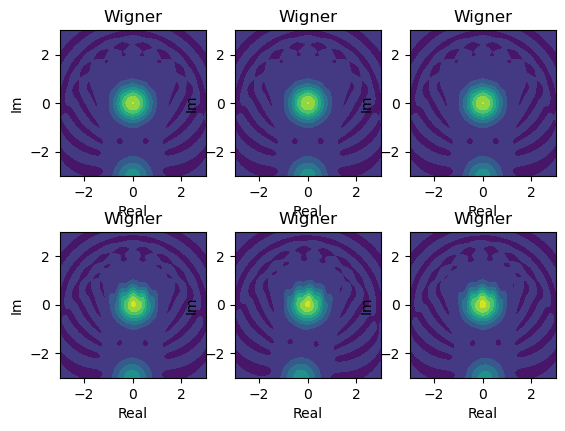

In [7]:
# Analysis
# define projectors on the wanted final state components
sα00 = coherentstate(fb,α*1im) ⊗ vac ⊗ vac
s0α0 = vac ⊗ coherentstate(fb,α*1im) ⊗ vac
s00α = vac ⊗ vac ⊗ coherentstate(fb,α*1im)

state_list = [sα00,s0α0,s00α]
# define ideal W state with given size
W_state = 1/√3*(sα00 + s0α0 + s00α)


fig, axs = subplots(2,3)
quick_plot_wigner(ptrace(W_state,[2,3]), ax = axs[1,1])
quick_plot_wigner(ptrace(W_state,[1,3]), ax = axs[1,2])
quick_plot_wigner(ptrace(W_state,[2,3]), ax = axs[1,3])

quick_plot_wigner(ptrace(ψ8,[1,3,4]), ax = axs[2,1])
quick_plot_wigner(ptrace(ψ8,[1,2,4]), ax = axs[2,2])
quick_plot_wigner(ptrace(ψ8,[1,2,3]), ax = axs[2,3])

#ideal dm 
println("Ideal Density matrix")
println()
result_array = zeros(Complex,3, 3)
for i in 1:3
    for j in 1:3
        result_array[i, j] = dagger(state_list[i]) *dm(W_state)* state_list[j]
    end
end
show(stdout, "text/plain", result_array)

println()
println("Protocol Density matrix")
println()
result_array = zeros(Complex,3, 3)
for i in 1:3
    for j in 1:3
        result_array[i, j] = dagger(state_list[i]) *ψ8_cav* state_list[j]
    end
end
show(stdout, "text/plain", result_array)


# Wigner Functions
println()
println("Wigner Functions:")

println()
println("State fidelity is: ", abs(fidelity(ψ8_cav,dm(W_state))))


gcf()

## W- state creation with qubit decay


In [4]:
### define loss operator
T1 = 25
κ = 1/T1
qubit_loss = sqrt(κ)*q ⊗ Ic ⊗ Ic ⊗ Ic
J = [qubit_loss]

1-element Vector{Operator{CompositeBasis{Vector{Int64}, NTuple{4, FockBasis{Int64}}}, CompositeBasis{Vector{Int64}, NTuple{4, FockBasis{Int64}}}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}}}:
 Operator(dim=10125x10125)
  basis: [Fock(cutoff=2) ⊗ Fock(cutoff=14) ⊗ Fock(cutoff=14) ⊗ Fock(cutoff=14)]sparse([1, 2, 4, 5, 7, 8, 10, 11, 13, 14  …  10111, 10112, 10114, 10115, 10117, 10118, 10120, 10121, 10123, 10124], [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 51, 53, 54, 56, 57, 59, 60, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 92, 93, 95, 96, 98, 99, 101, 102, 104, 105, 107, 108, 110, 111, 113, 114, 116, 117, 119, 120, 122, 123, 125, 126, 128, 129, 131, 132, 134, 135, 137, 138, 140, 141, 143, 144, 146, 147, 149, 150, 152, 153, 155, 156, 158, 159, 161, 162, 164, 165, 167, 168, 170, 171, 173, 174, 176, 177, 179, 180, 182, 183, 185, 186, 188, 189, 191, 192, 194, 195, 19

In [5]:
θ = π/2# rotate around y axis
ϕ = 0.95531*2
t_list_rotation = [0:0.01:0.05;]
t_list_displacement = [0:0.01:0.05;]
t_list_conditinal_displacement = [0:0.1:0.6;]

α = 2.8*1im # relative scaling factor. final state will be α00 + 0α0 +...

β_list_1 = [-2,1,1].*α/2
β_list_2 = [2,0,-2].*α/2
α_list = [0, 0.5,0.5].*α*1im

# 0. Start in gvvv 
ψ0 = gvvv
# 1. rotate ge by pi/2
ψ1 = R_evolution_ge_loss(ϕ*1/(last(t_list_rotation)), t_list_rotation, ψ0, J, θ) # roation around y
print("step 1 done")
# 2. conditional ge displacement
ψ2 = triple_CD_ge_evolution_loss(β_list_1.*(1/last(t_list_conditinal_displacement)), t_list_conditinal_displacement, ψ1, J)
print("step 2 done")
# 3. rotate ef by pi/2
ψ3 = R_evolution_ef_loss(π/2*1/(last(t_list_rotation)), t_list_rotation, ψ2, J, θ)
print("step 3 done")
# 4. conditional gf displacement
ψ4 = triple_CD_gf_evolution_loss(β_list_2.*1/last(t_list_conditinal_displacement), t_list_conditinal_displacement, ψ3, J)
print("step 4 done")
# 5. Single displacements  g
ψ5 = D_evolution_loss(α_list*1/(last(t_list_displacement)), t_list_displacement, ψ4, J)
print("step 5 done")
# 6. rotate ef by pi/2
ψ6 = R_evolution_ef_loss(-π/2*1/(last(t_list_rotation)), t_list_rotation, ψ5,J, θ)
print("step 6 done")
# 7. rotate ge by pi/2
ψ7 = R_evolution_ge_loss(-ϕ*1/(last(t_list_rotation)), t_list_rotation, ψ6,J, θ)
print("step 7 done")
# 8. project on g
ψ8 = normalize(proj_g  *ψ7);
ψ8_cav = ptrace(ψ8, [1])


step 1 done

step 2 done

step 3 done

step 4 done

step 5 done

step 6 done

OutOfMemoryError: OutOfMemoryError()

In [6]:
# Analysis
# define projectors on the wanted final state components
sα00 = coherentstate(fb,α*1im) ⊗ vac ⊗ vac
s0α0 = vac ⊗ coherentstate(fb,α*1im) ⊗ vac
s00α = vac ⊗ vac ⊗ coherentstate(fb,α*1im)

state_list = [sα00,s0α0,s00α]
# define ideal W state with given size
W_state = 1/√3*(sα00 + s0α0 + s00α)


fig, axs = subplots(2,3)
quick_plot_wigner(ptrace(W_state,[2,3]), ax = axs[1,1])
quick_plot_wigner(ptrace(W_state,[1,3]), ax = axs[1,2])
quick_plot_wigner(ptrace(W_state,[2,3]), ax = axs[1,3])

quick_plot_wigner(ptrace(ψ8,[1,3,4]), ax = axs[2,1])
quick_plot_wigner(ptrace(ψ8,[1,2,4]), ax = axs[2,2])
quick_plot_wigner(ptrace(ψ8,[1,2,3]), ax = axs[2,3])

#ideal dm 
println("Ideal Density matrix")
println()
result_array = zeros(Complex,3, 3)
for i in 1:3
    for j in 1:3
        result_array[i, j] = dagger(state_list[i]) *dm(W_state)* state_list[j]
    end
end
show(stdout, "text/plain", result_array)

println()
println("Protocol Density matrix")
println()
result_array = zeros(Complex,3, 3)
for i in 1:3
    for j in 1:3
        result_array[i, j] = dagger(state_list[i]) *ψ8_cav* state_list[j]
    end
end
show(stdout, "text/plain", result_array)


# Wigner Functions
println()
println("Wigner Functions:")

println()
println("State fidelity is: ", abs(fidelity(ψ8_cav,dm(W_state))))


gcf()

UndefVarError: UndefVarError: `ψ8` not defined